In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Lendo os CSVs

In [2]:
def read_data(year):
    return pd.read_csv('./crime-data-in-brazil/BO_'+ year +'.csv')

In [3]:
ds_2015 = read_data('2015')
ds_2016 = read_data('2016')

/home/marco/dl_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/home/marco/dl_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [4]:
ds_2016.columns

Index(['NUM_BO', 'ANO_BO', 'ID_DELEGACIA', 'NOME_DEPARTAMENTO',
       'NOME_SECCIONAL', 'DELEGACIA', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'ANO', 'MES',
       'FLAG_STATUS', 'RUBRICA', 'DESDOBRAMENTO', 'CONDUTA', 'LATITUDE',
       'LONGITUDE', 'CIDADE', 'LOGRADOURO', 'NUMERO_LOGRADOURO',
       'FLAG_STATUS.1', 'Unnamed: 21'],
      dtype='object')

## Deixando apenas as colunas importantes

In [5]:
n_2016 = ds_2016[['ANO', 'MES', 'RUBRICA', 'LATITUDE', 'LONGITUDE', 'CIDADE','LOGRADOURO']]
n_2016.head()

,ANO,MES,RUBRICA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO
0,2016,7,Furto (art. 155),-23.564984,-46.652035,S.PAULO,AVENIDA PAULISTA
1,2016,5,Roubo (art. 157),-23.542476,-46.641928,S.PAULO,PRAÇA DA REPUBLICA
2,2016,10,Drogas sem autorização ou em desacordo (Art.33...,-23.542183,-46.640599,S.PAULO,RUA CONSELHEIRO NEBIAS
3,2016,3,Roubo (art. 157),-23.609275,-46.455087,S.PAULO,RUA MADUREIRA CALHEIROS
4,2016,12,Lesão corporal (art. 129),-23.573928,-46.620693,S.PAULO,RUA ROBERTSON


## Analisando os dados

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

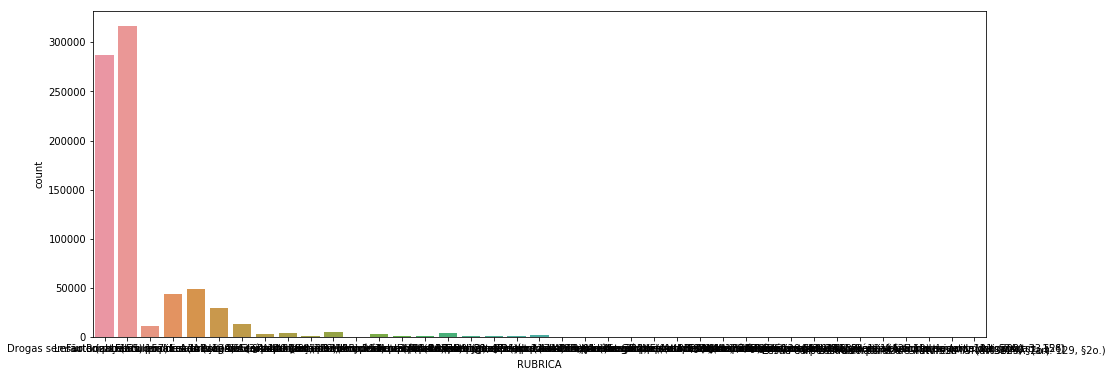

In [7]:
plt.figure(figsize=(16, 6))
sns.countplot(x=n_2016['RUBRICA'], data=n_2016)

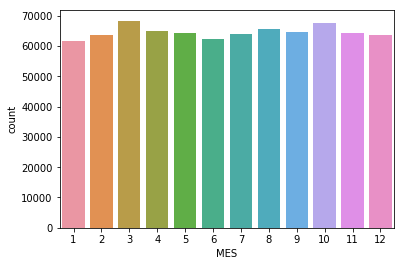

In [8]:
sns.countplot(x=n_2016['MES'], data=n_2016)

## Manipulando o dataframe

In [9]:
#transformando data em uma coluna só
n_2016['DATA'] = pd.to_datetime(dict(year=n_2016.ANO, month=n_2016.MES, day=1))
n_2016 = n_2016.sort_values(by='DATA')
#tratando dado categórico do tipo de crime
n_2016 = pd.get_dummies(n_2016, columns=['RUBRICA'])
#Renomeando algumas colunas para diminuir seus nomes
n_2016.rename(columns={
       'RUBRICA_Drogas sem autorização ou em desacordo (Art.33, caput)' : 'RUBRICA_Drogas (Art.33, caput)',
       'RUBRICA_Lesão corporal culposa na direção de veículo automotor (Art. 303)': 'RUBRICA_Lesão corp culposa/veículo(Art. 303)',
       'RUBRICA_A.I.-Drogas sem autorização ou em desacordo (Art.33, caput)':'RUBRICA_A.I.-Drogas (Art.33, caput)' ,
       'RUBRICA_Homicídio culposo na direção de veículo automotor (Art. 302)': 'RUBRICA_Homicídio culposo/veículo(Art. 302)',
       'RUBRICA_Oferecer droga a pessoa de seu relacionamento (Art.33,§3º)': 'RUBRICA_Oferecer droga(Art.33,§3º)' ,
       'RUBRICA_A.I.-Lesão corporal culposa na direção de veículo automotor (Art. 303)': 'RUBRICA_A.I.-Lesão corp/veículo(Art. 303)',
       'RUBRICA_Lesão corporal de natureza GRAVE (art. 129, §1o.)': 'RUBRICA_Lesão corporal GRAVE (art. 129, §1o.)',
       'RUBRICA_A.I.-Oferecer droga a pessoa de seu relacionamento (Art.33,§3º)': 'RUBRICA_A.I.-Oferecer droga (Art.33,§3º)',
       'RUBRICA_A.I.-Lesão corporal de natureza GRAVE (art. 129, §1o.)': 'RUBRICA_A.I.-Lesão corp. GRAVE (art. 129, §1o.)',
       'RUBRICA_A.I.-Homicídio culposo na direção de veículo automotor (Art. 302)': 'RUBRICA_A.I.-Homicídio culp. veículo(Art. 302)',
       'RUBRICA_Induzir, instigar ou auxiliar alguém ao uso indevido de droga(Art.33,§2º)': 'RUBRICA_Induzir uso de droga(Art.33,§2º)',
       "RUBRICA_Lesão corporal  de natureza 'GRAVÍSSIMA' (art. 129, §2o.)": 'RUBRICA_Lesão corp GRAVÍSSIMA (art. 129, §2o.)',
       "RUBRICA_A.I.-Lesão corporal  de natureza 'GRAVÍSSIMA' (art. 129, §2o.)": "RUBRICA_A.I.-Lesão corp'GRAVÍSSIMA' (art. 129, §2o.)"
}, inplace=True)
n_2016.head()

/home/marco/dl_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ANO,MES,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,DATA,"RUBRICA_A.I.-Drogas (Art.33, caput)",RUBRICA_A.I.-Estupro de vulneravel (art.217-A),RUBRICA_A.I.-Furto (art. 155),...,"RUBRICA_Induzir uso de droga(Art.33,§2º)","RUBRICA_Lesão corp GRAVÍSSIMA (art. 129, §2o.)",RUBRICA_Lesão corporal (art 129 § 9º),RUBRICA_Lesão corporal (art. 129),RUBRICA_Lesão corporal culposa (art. 129. §6o.),RUBRICA_Lesão corp culposa/veículo(Art. 303),"RUBRICA_Lesão corporal GRAVE (art. 129, §1o.)","RUBRICA_Lesão corporal seguida de morte (art. 129, §3o.)","RUBRICA_Oferecer droga(Art.33,§3º)",RUBRICA_Roubo (art. 157)
207483,2016,1,-23.699094,-46.531260,S.ANDRE,RUA EXPEDICIONÁRIO OSCÁR VANO,2016-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174772,2016,1,-23.777026,-46.519140,S.BERNARDO DO CAMPO,RUA ALJUBARROTA,2016-01-01,0,0,0,...,0,0,0,0,0,1,0,0,0,0
623475,2016,1,-23.564791,-46.569479,S.PAULO,RUA BAIA DAS GARCAS,2016-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174749,2016,1,-23.524906,-46.335047,POA,AVENIDA BRASIL,2016-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174741,2016,1,-23.532109,-46.662689,S.PAULO,AVENIDA FRANCISCO MATARAZZO,2016-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#n_2016.groupby('DATA')['DATA'].transform('count').unique()

In [24]:
#n_2016.columns

In [25]:
# df = pd.DataFrame({'date': n_2016['DATA'].unique(),
#                    'n_crimes': n_2016.groupby('DATA')['DATA'].transform('count').unique(),
#                    'A.I.- Drogas': n_2016['RUBRICA_A.I.-Estupro de vulneravel (art.217-A)'].groupby(n_2016.DATA).agg('sum').values,
#                    'A.I.-Estupro de vulneravel (art.217-A)': n_2016['RUBRICA_A.I.-Estupro de vulneravel (art.217-A)'].groupby(n_2016.DATA).agg('sum').values,
#                   })
# df

## Criando dataframe apenas com data e nº de ocorrências para cada tipo

In [10]:
## deixando em df_crimes apenas as informações de RUBRICA
df_crimes = n_2016.drop(columns = ['DATA', 'ANO', 'MES', 'LATITUDE', 'LONGITUDE', 'CIDADE','LOGRADOURO'])
columns = list(df_crimes)
## contanto crimes e agrupando por data
df = pd.DataFrame({'DATA': n_2016.DATA.unique()})
for i in columns:
    df[i] = n_2016[i].groupby(n_2016.DATA).agg('sum').values
df

,DATA,"RUBRICA_A.I.-Drogas (Art.33, caput)",RUBRICA_A.I.-Estupro de vulneravel (art.217-A),RUBRICA_A.I.-Furto (art. 155),RUBRICA_A.I.-Furto de coisa comum (art. 156),"RUBRICA_A.I.-Furto qualificado (art. 155, §4o.)","RUBRICA_A.I.-Homicídio culposo (art. 121, §3o.)",RUBRICA_A.I.-Homicídio culp. veículo(Art. 302),"RUBRICA_A.I.-Homicídio qualificado (art. 121, §2o.)",RUBRICA_A.I.-Homicídio simples (art. 121),...,"RUBRICA_Induzir uso de droga(Art.33,§2º)","RUBRICA_Lesão corp GRAVÍSSIMA (art. 129, §2o.)",RUBRICA_Lesão corporal (art 129 § 9º),RUBRICA_Lesão corporal (art. 129),RUBRICA_Lesão corporal culposa (art. 129. §6o.),RUBRICA_Lesão corp culposa/veículo(Art. 303),"RUBRICA_Lesão corporal GRAVE (art. 129, §1o.)","RUBRICA_Lesão corporal seguida de morte (art. 129, §3o.)","RUBRICA_Oferecer droga(Art.33,§3º)",RUBRICA_Roubo (art. 157)
0,2016-01-01,356.0,24,86,0,55,0,1,2,8,...,1,1,1198.0,3634.0,113,2279.0,11,3,8,25770.0
1,2016-02-01,363.0,37,93,0,57,0,0,3,6,...,0,0,1223.0,3989.0,115,2376.0,10,0,9,25231.0
2,2016-03-01,396.0,32,113,1,65,0,0,2,4,...,0,1,1269.0,4036.0,127,2562.0,15,1,12,28279.0
3,2016-04-01,378.0,29,102,0,67,0,1,0,5,...,0,2,1142.0,3985.0,102,2711.0,21,0,5,25907.0
4,2016-05-01,432.0,30,99,0,59,0,0,2,4,...,0,3,937.0,3304.0,72,2614.0,10,0,18,25238.0
5,2016-06-01,458.0,34,100,0,67,0,0,0,4,...,2,2,849.0,3083.0,111,2501.0,10,1,7,24986.0
6,2016-07-01,416.0,32,94,0,67,0,0,1,1,...,0,1,1082.0,3442.0,112,2602.0,17,0,5,25689.0
7,2016-08-01,391.0,29,96,0,63,0,0,3,8,...,0,1,1028.0,3600.0,104,2568.0,14,0,3,26935.0
8,2016-09-01,359.0,35,114,0,52,0,0,1,4,...,1,2,1053.0,3467.0,124,2357.0,15,2,7,26740.0
9,2016-10-01,353.0,35,94,0,64,0,1,1,10,...,3,2,1305.0,3844.0,109,2368.0,8,4,3,28265.0


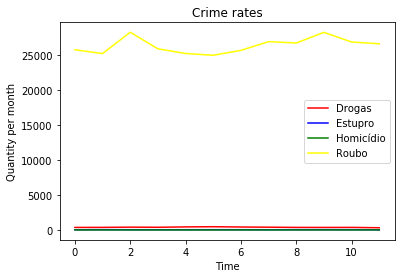

In [17]:
#sns.lineplot(x='DATA',y='RUBRICA_A.I.-Drogas (Art.33, caput)',data=df)

plt.plot(df['RUBRICA_A.I.-Drogas (Art.33, caput)'], color = 'red', label = 'Drogas')
plt.plot(df['RUBRICA_A.I.-Estupro de vulneravel (art.217-A)'], color = 'blue', label = 'Estupro')
plt.plot(df['RUBRICA_A.I.-Homicídio culposo (art. 121, §3o.)'], color = 'green', label = 'Homicídio')
plt.plot(df['RUBRICA_Roubo (art. 157)'], color = 'yellow', label = 'Roubo')
plt.title('Crime rates')
plt.xlabel('Time')
plt.ylabel('Quantity per month')
plt.legend()
plt.show()

## Visualizando mapa

In [2]:
# Adiciona bibliotecas de visualização
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import WMTSTileSource

output_notebook()

Loading BokehJS ...

In [23]:
# Marcador de coordenadas
SP = x_range,y_range = ((-5240000,-5155550), (-1000,-5445555))

p = figure(tools='pan, wheel_zoom', x_range=x_range, y_range=y_range, 
           x_axis_type="mercator", y_axis_type="mercator", plot_width=960)

In [24]:
# Define o tipo de mapa
# url = 'http://a.basemaps.cartocdn.com/rastertiles/voyager/{Z}/{X}/{Y}.png'
url = 'http://a.basemaps.cartocdn.com/rastertiles/voyager_labels_under/{Z}/{X}/{Y}.png'
# url = 'http://a.basemaps.cartocdn.com/rastertiles/voyager_no_labels_no_buildings/{Z}/{X}/{Y}.png'
# url = 'http://a.basemaps.cartocdn.com/rastertiles/light_all/{Z}/{X}/{Y}.png'
# url = 'http://a.basemaps.cartocdn.com/rastertiles/dark_all/{Z}/{X}/{Y}.png'
# url = 'http://a.basemaps.cartocdn.com/rastertiles/dark_nolabels/{Z}/{X}/{Y}.png'

attribution = "Mapa da cidade de São Paulo"

p.add_tile(WMTSTileSource(url=url, attribution=attribution))

TileRenderer(id='2520', ...)

In [25]:
show(p)

In [9]:
def wgs84_to_web_mercator(df, lon="lon", lat="lat"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

df = pd.DataFrame(dict(name=["São Paulo", "Santo André"], lon=[-46.6388, -46.5322], lat=[-23.5489, -23.6666]))
wgs84_to_web_mercator(df)

,name,lon,lat,x,y
0,São Paulo,-46.6388,-23.5489,-5.191807e+06,-2.698535e+06
1,Santo André,-46.5322,-23.6666,-5.179941e+06,-2.712834e+06


## Criando RNN